**Sales Price Prediction**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Advertising.csv')

In [12]:
df.head

<bound method NDFrame.head of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [15]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

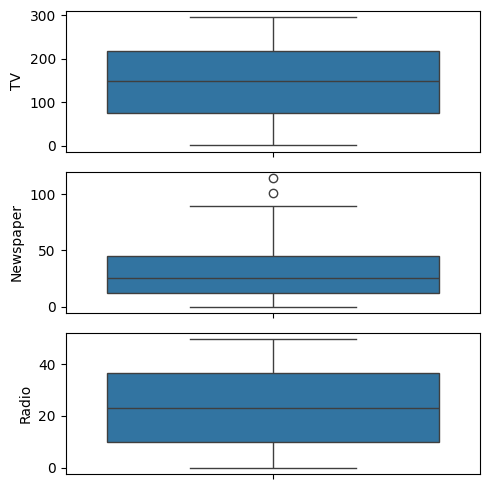

In [17]:
fig, axs = plt.subplots(3, figsize =(5,5))
plt1 = sns.boxplot(df['TV'], ax= axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax= axs[1])
plt3 = sns.boxplot(df['Radio'], ax= axs[2])
plt.tight_layout()

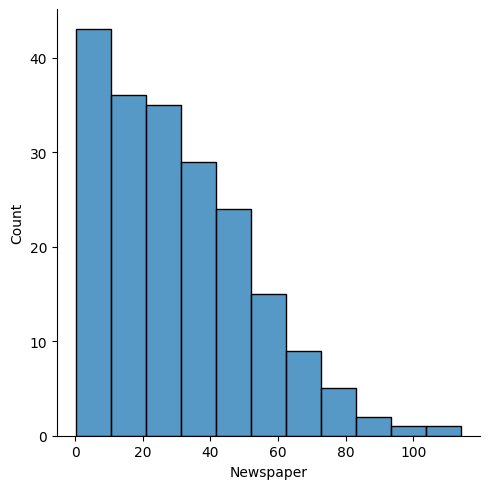

In [23]:
sns.displot(df['Newspaper'])

In [24]:
iqr = df.Newspaper.quantile(0.75)-df.Newspaper.quantile(0.25)

In [27]:
lower_bridge = df ["Newspaper"].quantile(0.25)-(iqr*1.5)
upper_bridge = df ["Newspaper"].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [28]:
data = df.copy()

In [29]:
data.loc[data['Newspaper']>=93,'Newspaper'] =93

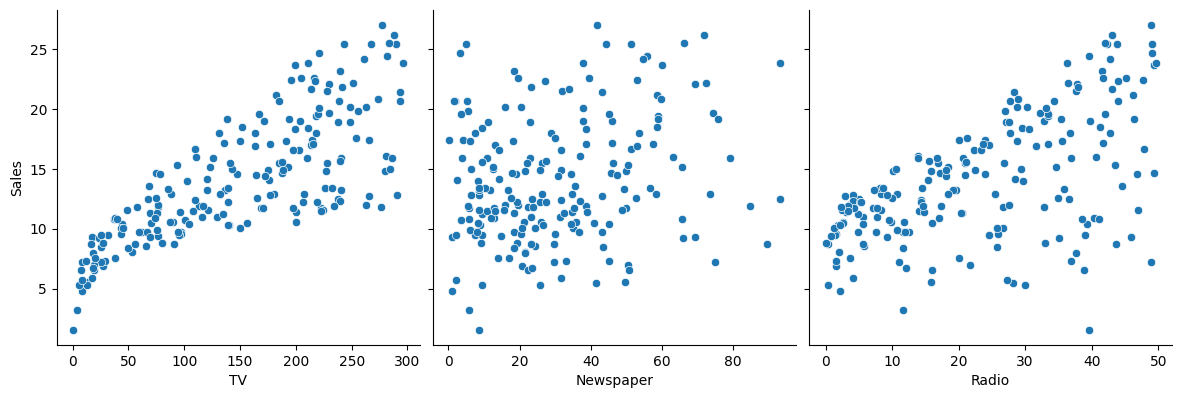

In [38]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],
            y_vars= 'Sales', height=4,aspect=1,kind='scatter')
plt.show()

In [42]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.50)|(df.corr()['Sales']<-0.5)].index)

In [43]:
print(important_features)

['TV', 'Radio', 'Sales']


In [44]:
X = data ['TV']
y = data['Sales']

In [45]:
X = X.values.reshape(-1,1)

In [46]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [47]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [76]:
print(X.shape,y.shape)

(200, 1) (200,)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.33)

In [49]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
knn = KNeighborsRegressor().fit(X_train,y_train)

In [53]:
knn_train_pred = knn.predict(X_train)

In [54]:
knn_test_pred = knn.predict(X_test)

In [55]:
print(knn_train_pred, knn_test_pred)

[13.08 17.16 17.02 10.48 12.2  18.78  4.64 14.7   9.86 10.48 14.92 14.92
 13.66 11.44 18.64 10.74  6.26 11.   16.02 17.02 11.28 17.62 15.34  5.78
 16.02 20.76 17.22 15.08 17.94 21.88 16.2  11.44 18.1  20.88 13.66  8.26
  7.44 10.04  9.18 15.34 19.36 12.2  10.42  8.26 13.22 13.4  10.6  17.8
 16.94  9.16 16.88 12.02  4.64 11.   11.42 16.   18.64 13.26 14.9  16.2
  8.26 13.84 13.22 15.36  7.44 14.32 11.44 16.64 18.3  11.26 10.48 16.2
 16.2  11.72 17.16 12.9  13.08 16.94  8.26 17.2  19.36  7.62  9.5  16.06
 16.82 10.62 14.32 18.1  18.3   5.78 18.1  17.02 11.28 16.82 13.4  10.6
 15.1  17.16 15.34 16.64 13.4  13.22  6.26  8.72 13.22 13.26 18.7  13.22
 12.9  15.36 15.68 12.2  18.8   7.44 12.34 10.78 16.54 19.36 15.36 21.88
  9.64 16.24 11.8  10.88 18.1  12.2  10.74 16.16  7.76 16.78 13.4  11.42
 18.3  13.08] [15.32 17.94 16.94 21.88 13.8  17.62 15.08  7.44 15.08  5.78 17.28 17.2
 13.74  7.44 22.36 10.78 15.36 10.48 16.78  5.78  8.26 15.62 11.   15.64
 20.88  4.64 15.36 12.2   8.9  16.82 16.02

In [56]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbours", "Train R2": r2_train, "Test R2": r2, "Test RMSE": rmse, "Variance": variance}, ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

In [ ]:
Results.head()

In [86]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [87]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [88]:
print(svr_train_pred,svr_test_pred)

[13.40701554 16.29886878 16.04671576  9.04536006 10.86346196 17.15009807
  8.15405368 17.32273049  9.55179185  9.15596136 16.66177926 16.65747855
 13.00335017 10.52603201 16.99983885 10.42834485  8.25366761 11.75556319
 14.76134274 16.13024472 10.49819652 16.93811415 15.10061715  8.18667333
 14.56749173 17.50782319 17.49800149 16.77525962 16.92558546 17.57130548
 17.53494716 10.53529645 17.04819188 17.40360561 13.35218447  8.59682252
  8.41242839 10.21220115  8.82863102 15.19780639 17.56893747 10.80504265
  9.37751851  8.61668577 12.7535344  12.27264002 11.61035912 17.04966461
 15.78118873 10.08441629 17.42108479 10.78698946  8.13474149 11.74355289
 11.0319252  16.34139117 16.97425299 13.0718943  13.20250025 17.53494716
  8.65739912 13.2811164  12.52382564 13.94863363  8.37148885 14.51832399
 10.59994175 16.75012783 17.1043331  11.96152008  9.09171303 17.5530612
 17.54316732 10.72806945 16.2368134  13.56549299 13.41973017 15.75583096
  8.6001098  17.16596059 17.57485225  8.28215808  9.

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine", "Train R2": r2_train, "Test R2": r2, "Test RMSE": rmse, "Variance": variance}, ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

In [ ]:
Results.head()

In [93]:
import statsmodels.api as sm

In [98]:
X_train_constant = sm.add_constant(X_train)

In [100]:
model = sm.OLS(y_train, X_train_constant).fit()

In [102]:
model.params

const    7.380812
x1       0.044684
dtype: float64

In [103]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.88e-26
Time:                        20:51:17   Log-Likelihood:                -344.23
No. Observations:                 134   AIC:                             692.5
Df Residuals:                     132   BIC:                             698.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3808      0.550     13.418      0.0

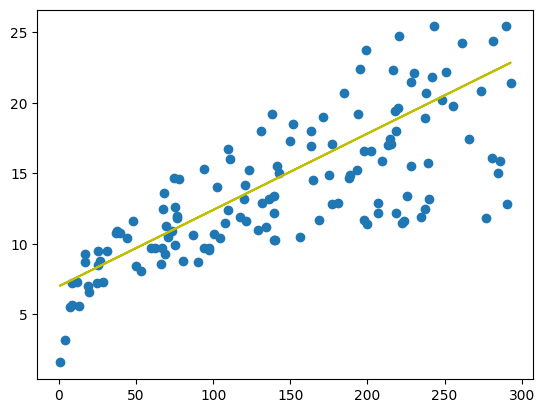

In [104]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [107]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred) 


In [108]:
print(res)

116   -1.400790
55     7.431590
141    3.163945
134    1.770357
80     1.005349
         ...   
146   -4.909381
71     0.112912
114    3.724919
181   -4.944212
67    -0.205259
Name: Sales, Length: 134, dtype: float64


In [109]:
y_train_pred

array([13.60079032, 16.26841026, 16.03605475,  9.02964258, 10.79465075,
       17.20230066,  7.56401554, 17.47040316,  9.53903734,  9.14582033,
       16.62588027, 16.62141189, 13.16288956, 10.46399099, 17.00569215,
       10.37015511,  7.90361205, 11.7374779 , 14.90555585, 16.11201713,
       10.43718074, 19.74480609, 15.20493698,  7.70700355, 14.73128922,
       18.7930422 , 17.8591518 , 16.7465264 , 16.91632465, 18.48025594,
       17.98873468, 10.47292774, 19.61075484, 19.05667633, 13.54270144,
        8.49790594,  8.22086668, 10.16460986,  8.78835032, 15.28983611,
       18.18087481, 10.73656187,  9.36923909,  8.52471619, 12.88138192,
       12.32730341, 11.57661639, 17.0682494 , 15.79923087, 10.04396373,
       17.66254329, 10.71868837,  7.41209079, 11.72407277, 10.964449  ,
       16.30862563, 16.97441353, 13.23885193, 13.38183994, 17.98873468,
        8.57833669, 13.46673906, 12.61774779, 14.15040046,  8.14937268,
       14.68660547, 10.53548499, 19.95481973, 17.13974341, 11.96

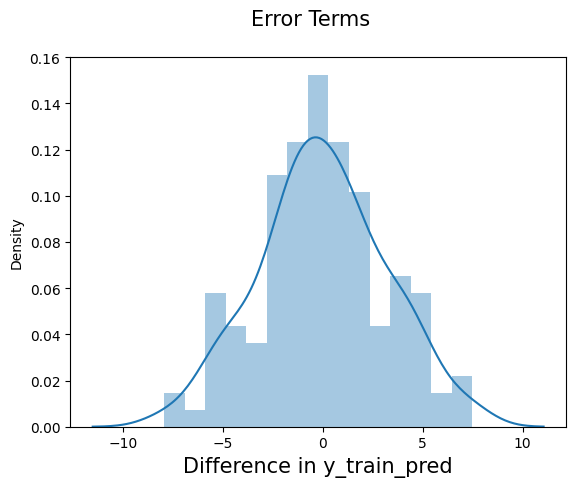

In [111]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train_pred', fontsize = 15)
plt.show()

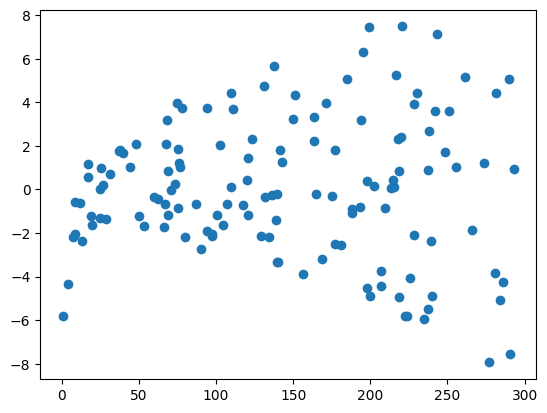

In [113]:
plt.scatter(X_train, res)
plt.show()

In [114]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [115]:
y_pred

array([13.9627287 , 16.92079302, 15.77242062, 18.49812944, 16.54098114,
       19.75374285, 16.8001469 ,  8.14937268, 16.79567852,  7.72934542,
       15.919877  , 17.23357928, 13.42205531,  8.21639831, 18.72154819,
       11.38894464, 16.50076576,  9.08773146, 18.10044405,  7.76509242,
        8.60961532, 14.9859866 , 11.65704714, 15.54006512, 19.12817033,
        7.62210442, 14.07443808, 10.74549862,  9.95012785, 17.53296042,
       14.83406185, 17.31847841,  8.44428544, 18.1093808 , 12.56412729,
       17.0503759 ,  8.18065131, 20.23185898, 17.63573304, 17.7519108 ,
       14.78044135,  9.30221346, 19.30690533,  9.37817584, 11.21020963,
       20.49996149, 16.27734701, 15.64283774, 19.23094296,  9.89203898,
        8.25661368, 10.79465075, 16.30862563, 12.99755968, 20.62507599,
       12.42560766, 15.23174723, 18.09597568, 11.67938902, 19.11923358,
       15.08875923, 20.05312398,  7.9661693 , 19.90119922,  9.30668184,
       11.32638739])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [117]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.4359049734174936

In [118]:
r2 = r2_score(y_test,y_pred)
r2

0.650823299976624

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.9955 + 0.0541 * X_test, 'y')